# Pipeline - Begin:

In [2]:
# dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

financials = "./Resources/Tesla Financials/Testla Operations Financials.xlsx"
stock_price = "./Resources/Tesla Stock Price/TSLAstock.xlsx"
ps_ratio = "./Resources/Tesla Stock Price/TSLApsratio.xlsx"
twitter = "./Resources/Tesla Twitter/twitter tweets.xlsx"

In [3]:
# set df_variable: financial statement
financials_excel = pd.read_excel(financials)
financials_df = financials_excel[["date","operating_income","cf_from_operations"]]

In [4]:
# set df_variabel: stock price
stock_price_excel = pd.read_excel(stock_price)
stock_price_df = stock_price_excel[["date","Close","Volume"]]

In [5]:
# set df_variable: price-to-sales ratio
ps_ratio_xlsx = pd.read_excel(ps_ratio)
ps_ratio_df = ps_ratio_xlsx[["date","P/S Ratio"]]

In [6]:
# set df_variable: twitter sentiment
twitter_csv = pd.read_excel(twitter)
twitter_df = twitter_csv[["date","TSLA_compound","ElonMusk_compound"]]

In [7]:
# merge: financials and stock price (AS: tesla_df_1)
tesla_df_1 = pd.merge(financials_df,stock_price_df, how="outer",on="date")

In [8]:
# merge: tesla_df_1 and ps ratio (AS: tesla_df_2)
tesla_df_2 = pd.merge(tesla_df_1,ps_ratio_df, how="outer",on="date")

In [9]:
# merge: tesla_df_2 and twitter (AS: tesla_df_3)
tesla_df_3 = pd.merge(tesla_df_2,twitter_df, how="outer",on="date")

In [10]:
# converting column: convert 'date' column to pandas.to_datetime(), THEN adding it as a new column to df
tesla_df_3["date_converted"] = pd.to_datetime(tesla_df_3["date"])

In [11]:
# converting column: convert 'date' column to pandas.to_numeric(), THEN adding it as a new column to df
tesla_df_3["date_converted_to_numeric"] = pd.to_numeric(tesla_df_3["date_converted"])

In [12]:
# sort: by date (final wrangling/applying as: tesla_df )
tesla_df = tesla_df_3.sort_values(by=["date_converted"],ascending = False)
tesla_df.head()

# use to this code: to audit via excel
# tesla_df.to_csv("tesla_df.csv",index=False,header=True)

,date,operating_income,cf_from_operations,Close,Volume,P/S Ratio,TSLA_compound,ElonMusk_compound,date_converted,date_converted_to_numeric
623,2018-06-19,NaN,NaN,352.550000,12537147.0,5.125,0.078213,0.078213,2018-06-19,1529366400000000000
622,2018-06-18,NaN,NaN,370.829987,11985600.0,5.030,0.108785,0.108785,2018-06-18,1529280000000000000
625,2018-06-17,NaN,NaN,NaN,NaN,NaN,0.130824,0.130824,2018-06-17,1529193600000000000
624,2018-06-16,NaN,NaN,NaN,NaN,NaN,0.130824,0.130824,2018-06-16,1529107200000000000
621,2018-06-15,NaN,NaN,358.170013,10848300.0,4.899,0.108785,0.108785,2018-06-15,1529020800000000000


# Pipeline - End:

In [13]:
len(tesla_df["date"])

626

In [14]:
tesla_df.dtypes

date                                 object
operating_income                    float64
cf_from_operations                  float64
Close                               float64
Volume                              float64
P/S Ratio                           float64
TSLA_compound                       float64
ElonMusk_compound                   float64
date_converted               datetime64[ns]
date_converted_to_numeric             int64
dtype: object

# Graph Section:

## Reuben's

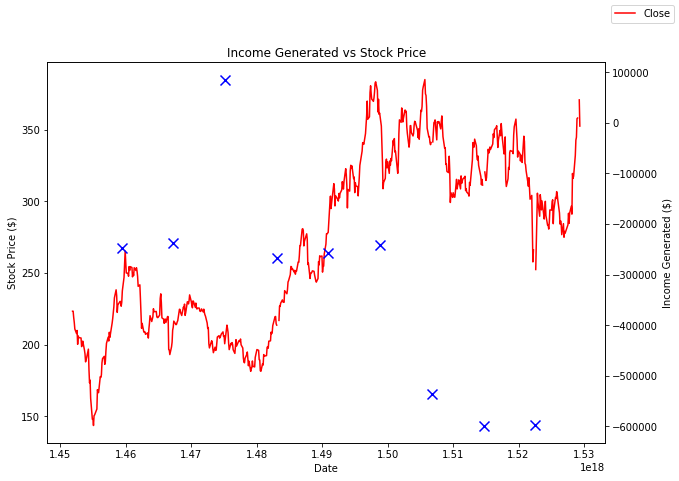

In [23]:
# Plot - Operating Income vs Closing Prices

plt.figure(figsize=(900,6))

ax = tesla_df.plot(x="date_converted_to_numeric",
                   y="Close",
                   legend=False,
                   color="Red")
    
ax2 = ax.twinx()

tesla_df.plot(x="date_converted_to_numeric",
              y="operating_income",
              kind="scatter",
              marker='x',
              alpha=1,
              c="blue",
              s=100,
              edgecolor="green",
              legend=False,
              figsize=(10,7),
              ax=ax2)

ax.figure.legend()

plt.title("Income Generated vs Stock Price")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price ($)")
ax2.set_ylabel("Income Generated ($)")

plt.savefig("Income Generated vs Stock Prices.png")

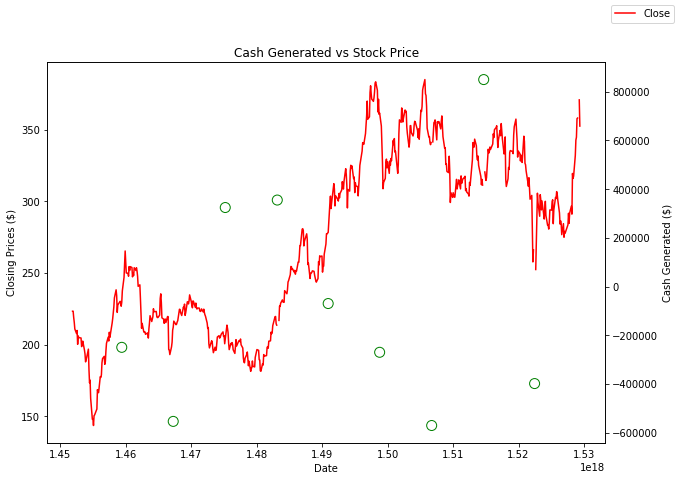

In [19]:
# Plot - CASH Generated from Business Operations vs Closing Prices

# Plot - Operating Income vs Closing Prices

plt.figure(figsize=(900,6))

ax = tesla_df.plot(x="date_converted_to_numeric",
                   y="Close",
                   legend=False,
                   color="Red")
    
ax2 = ax.twinx()

tesla_df.plot(x="date_converted_to_numeric",
              y="cf_from_operations",
              kind="scatter",
              marker='o',
              alpha=1,
              c="none",
              s=100,
              edgecolor="green",
              legend=False,
              figsize=(10,7),
              ax=ax2)

ax.figure.legend()

plt.title("Cash Generated vs Stock Price")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Prices ($)")
ax2.set_ylabel("Cash Generated ($)")

plt.savefig("Cash Generated vs Stock Prices.png")

## Andy's

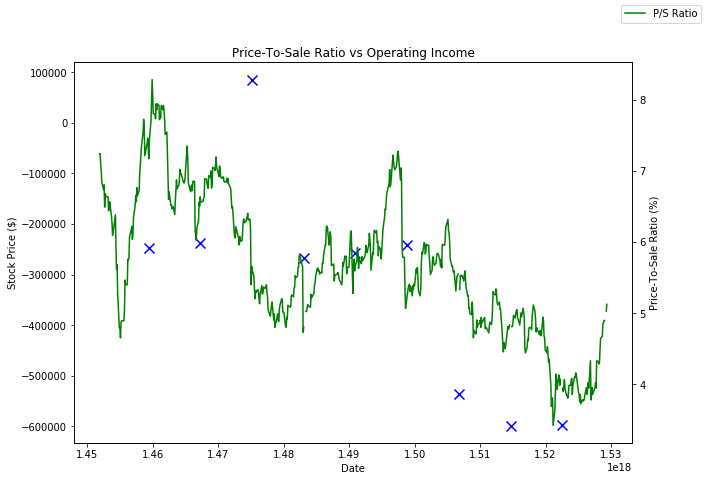

In [51]:
# plot - PS ratio vs Operating Income

plt.figure(figsize=(900,6))

ax = tesla_df.plot(x="date_converted_to_numeric",
                   y="operating_income",
                   marker='x',
                   legend=False,
                   color="blue",
                   kind="scatter",
                   s=100)

ax2 = ax.twinx()

tesla_df.plot(x="date_converted_to_numeric",
             y="P/S Ratio",
             ax=ax2,
             legend=False,
             color="Green",
             figsize=(10,7))

# plt.xticks(tesla_df["date_converted_to_numeric"], tesla_df["date"], rotation='vertical')

ax.figure.legend()

plt.title("Price-To-Sale Ratio vs Operating Income")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price ($)")
ax2.set_ylabel("Price-To-Sale Ratio (%)")

plt.savefig("Price-To_Sale Ratio vs Operating Income.png")

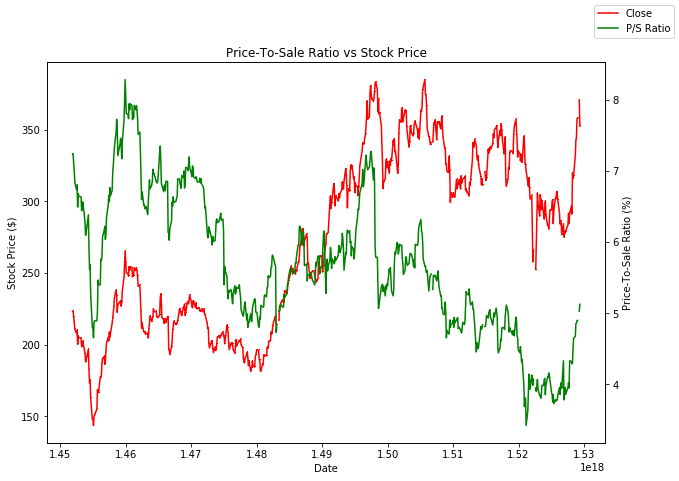

In [50]:
# plot - PS ratio vs Stock Price

plt.figure(figsize=(900,6))

ax = tesla_df.plot(x="date_converted_to_numeric",
                   y="Close",
                   marker=',',
                   legend=False,
                   color="red",
                   kind="line")

ax2 = ax.twinx()

tesla_df.plot(x="date_converted_to_numeric",
             y="P/S Ratio",
             ax=ax2,
             legend=False,
             color="Green",
             figsize=(10,7))

# plt.xticks(tesla_df["date_converted_to_numeric"], tesla_df["date"], rotation='vertical')

ax.figure.legend()

plt.title("Price-To-Sale Ratio vs Stock Price")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price ($)")
ax2.set_ylabel("Price-To-Sale Ratio (%)")

plt.savefig("Price-To_Sale Ratio vs Stock Price.png")